<a href="https://colab.research.google.com/github/jessiejxyu2/ist526/blob/main/IST_526_Final_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IST 526 Final Project code


## Null hypothesis (H0)
### The completion time for finding task shapes will not be significantly affected by increasing the number of distractor types from two to three.

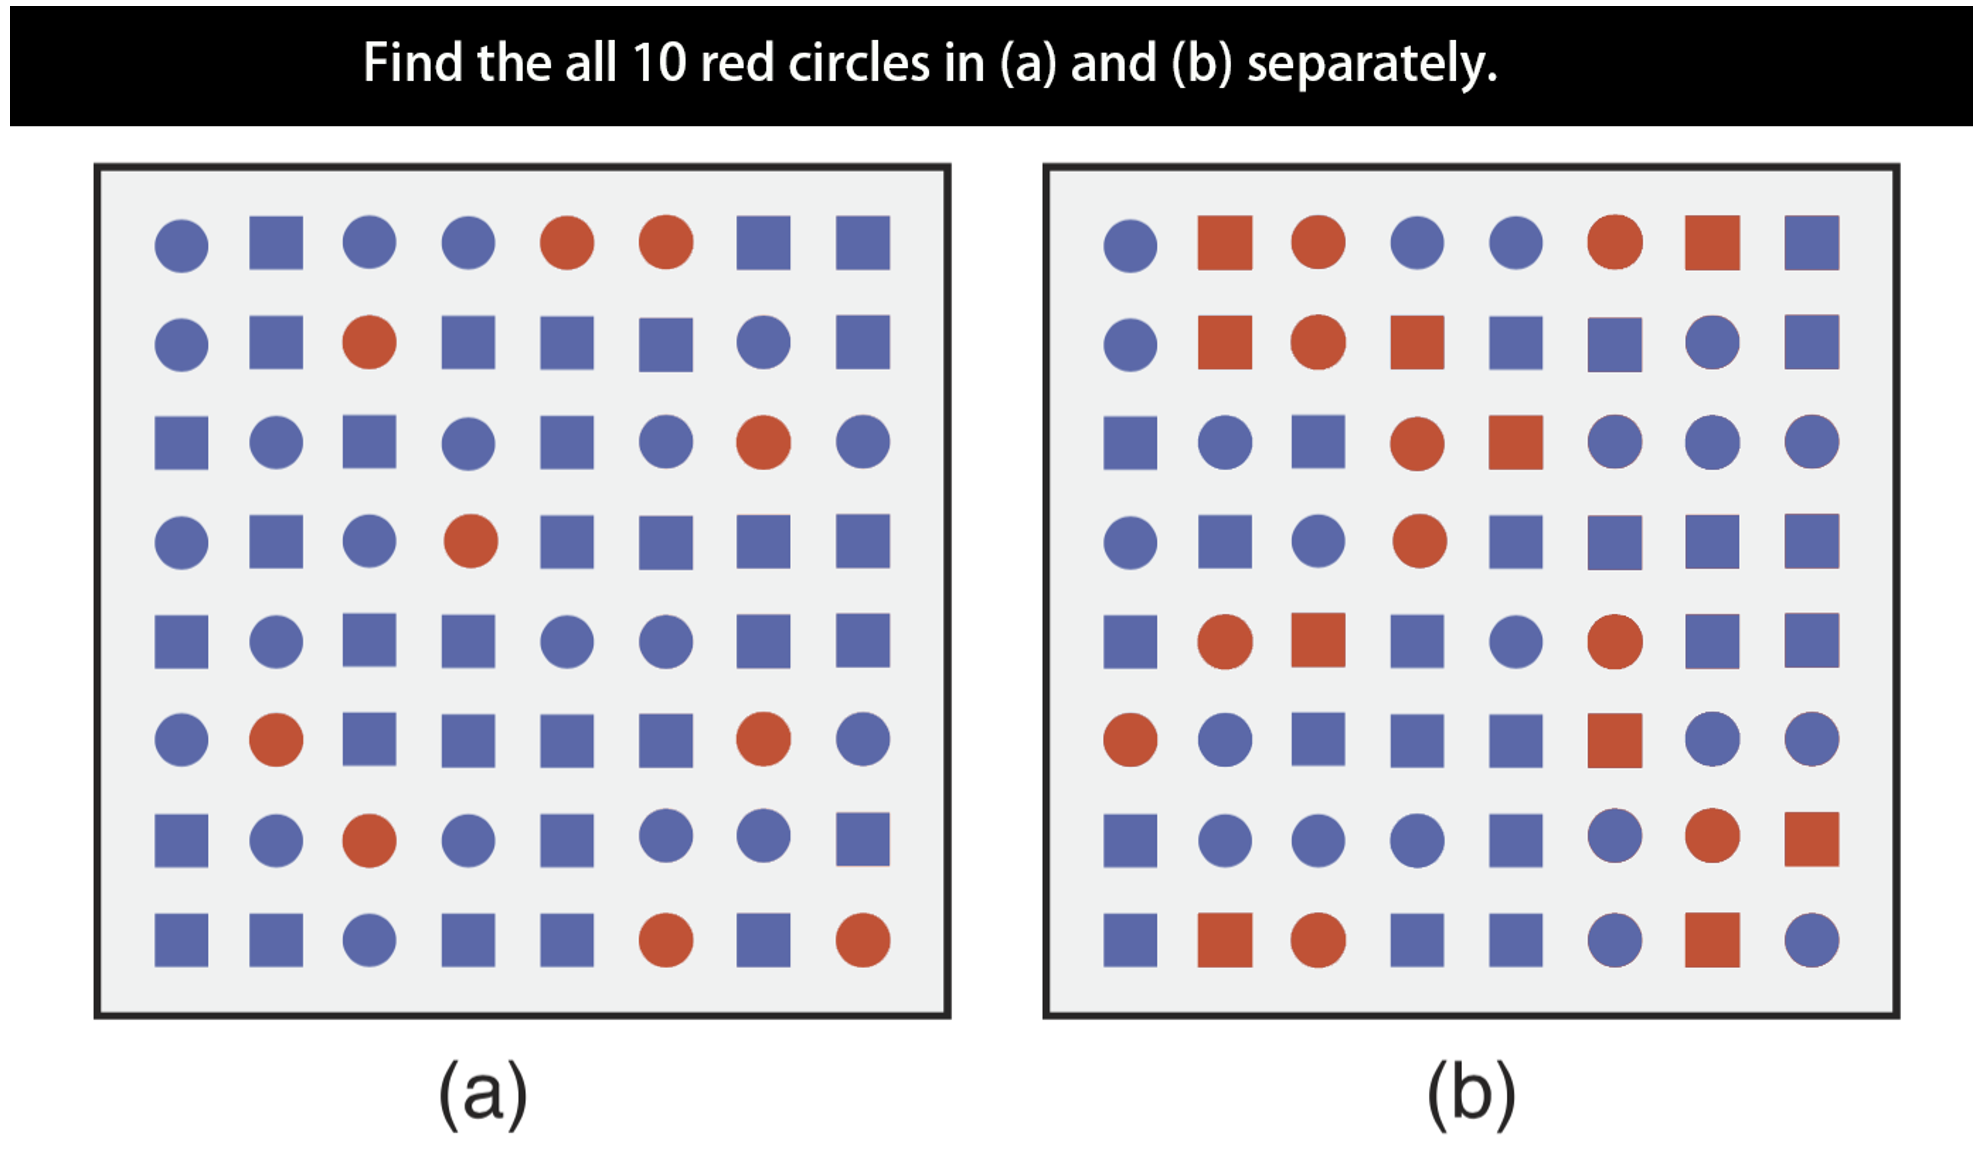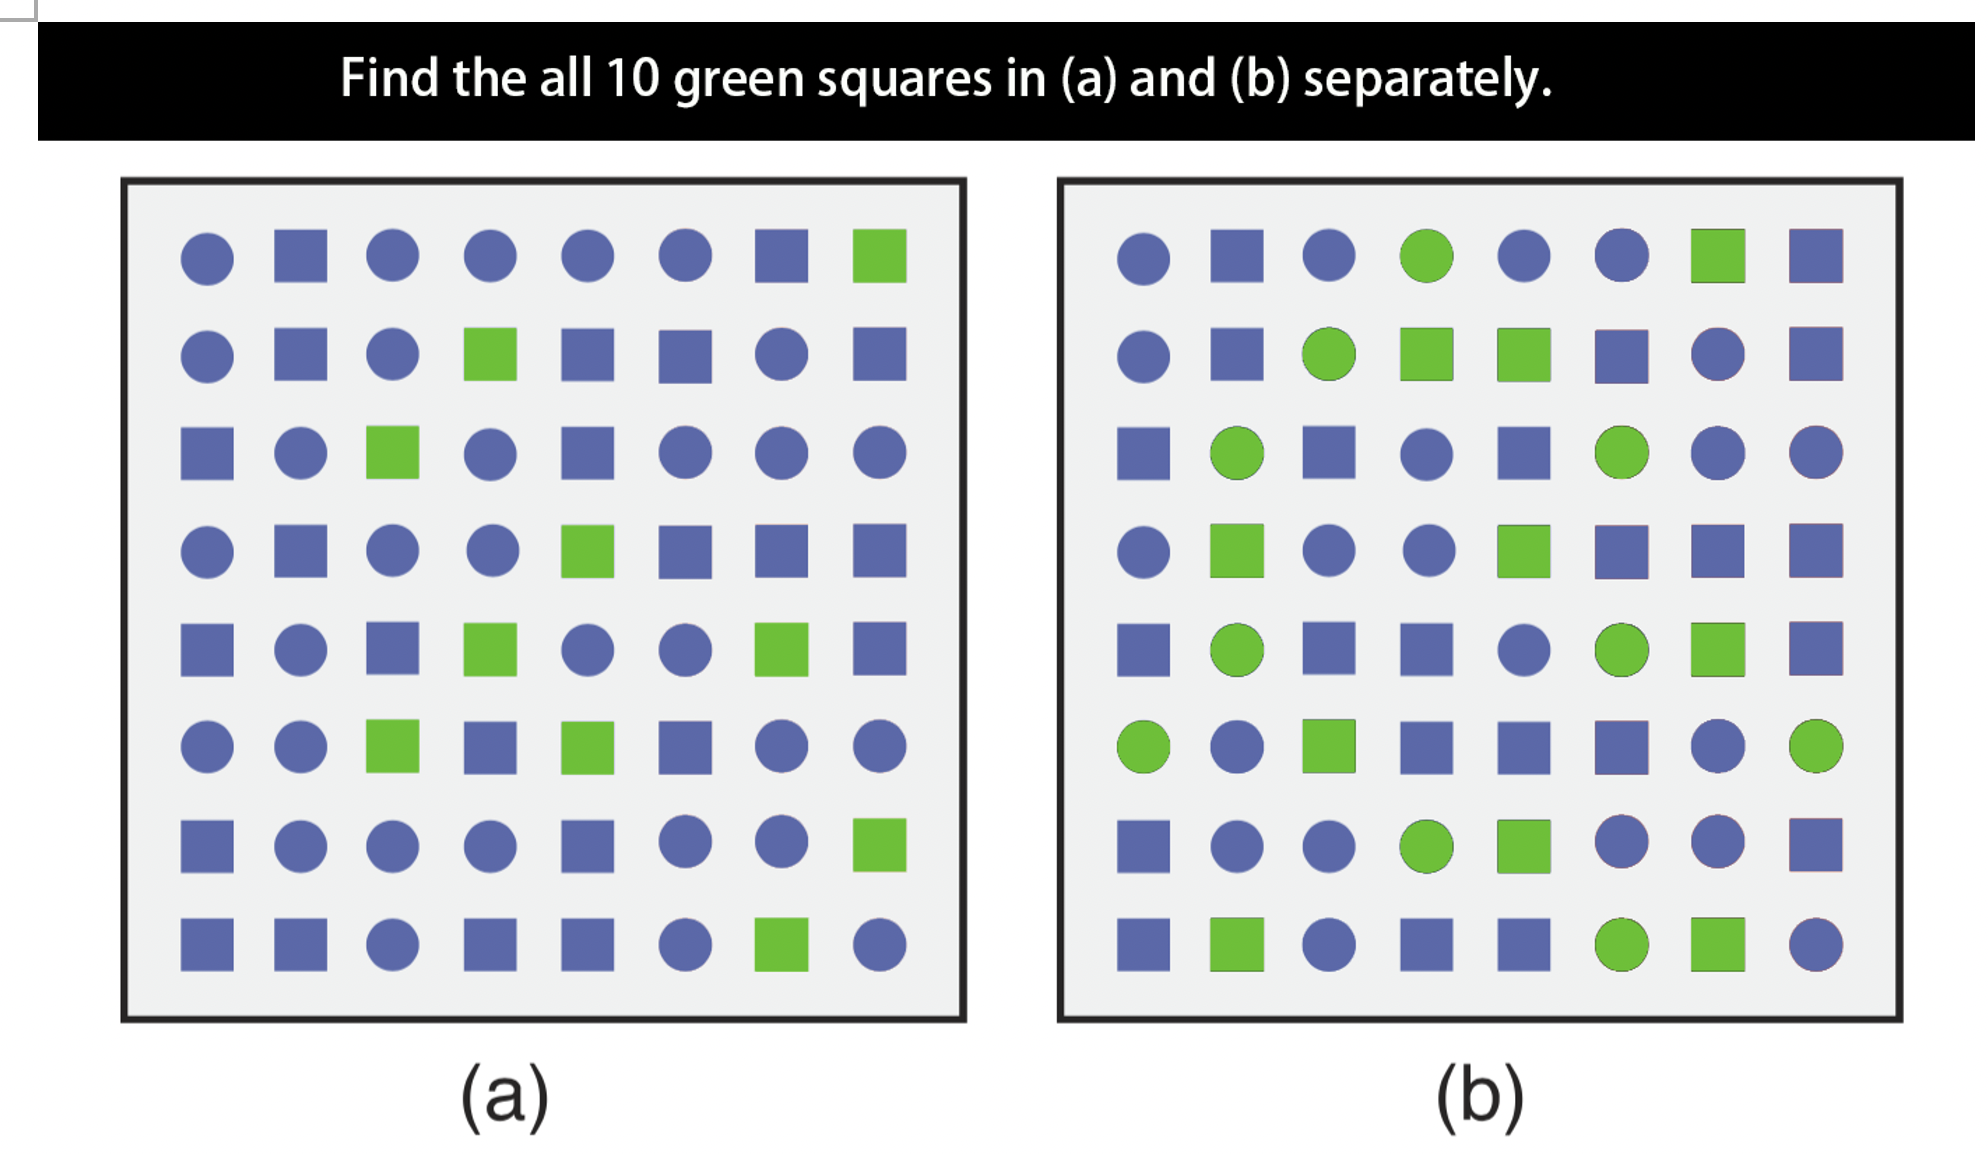

In [ ]:
## target for interactive visualizations:
# a) The rationale behind the chosen visualization(s);  
# b) The exploratory purpose of the visualization(s);
# c) The role of the visualization(s) in validating or rejecting a hypothesis (storytelling aspect)

## Raw data

In [ ]:
import pandas as pd
import altair as alt

# Create the DataFrames
data_T1 = {'C1': [13.17, 8.28, 7.42, 12.27, 10.82, 9.58],
           'C2': [13.65, 10.48, 6.84, 11.9, 13.16, 11.37]}
data_T2 = {'C1': [12.78, 8.09, 8.44, 12.5, 10.92, 10.48],
           'C2': [12.03, 10.55, 7.21, 11.48, 11.82, 8.18]}
index = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']

df_T1 = pd.DataFrame(data_T1, index=index).reset_index().rename(columns={"index": "Participant"})
df_T2 = pd.DataFrame(data_T2, index=index).reset_index().rename(columns={"index": "Participant"})

# Melt the DataFrames into a long format
df_T1_long = df_T1.melt(id_vars='Participant', var_name='Condition', value_name='Time')
df_T2_long = df_T2.melt(id_vars='Participant', var_name='Condition', value_name='Time')

# Create the line plots
chart_T1 = alt.Chart(df_T1_long).mark_line().encode(
    x='Participant',
    y='Time',
    color='Condition',
    tooltip=['Participant','Condition','Time'] # show Time and participant in a tooltip
).properties(
    width=400,
    height=400,
    title="T1"
).interactive()

chart_T2 = alt.Chart(df_T2_long).mark_line().encode(
    x='Participant',
    y='Time',
    color='Condition',
    tooltip=['Participant','Condition','Time'] # show Time and participant in a tooltip
).properties(
    width=400,
    height=400,
    title="T2"
).interactive()

(chart_T1 | chart_T2).display()

alt.HConcatChart(...)

## SNS & NASA

In [ ]:
import pandas as pd
import altair as alt

# Create the DataFrames
data_T1 = {'C1': [85, 95, 92.5, 87.5, 97.5, 60],
           'C2': [85, 95, 92.5, 62.5, 95, 55]}
data_T2 = {'C1': [34.44, 8, 11.66, 12.66, 24.9, 67],
           'C2': [27.66, 10, 15.99, 24.66, 25, 82.66]}
index = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']

df_T1 = pd.DataFrame(data_T1, index=index).reset_index().rename(columns={"index": "Participant"})
df_T2 = pd.DataFrame(data_T2, index=index).reset_index().rename(columns={"index": "Participant"})

# Melt the DataFrames into a long format
df_T1_long = df_T1.melt(id_vars='Participant', var_name='Condition', value_name='Score')
df_T2_long = df_T2.melt(id_vars='Participant', var_name='Condition', value_name='Score')

# Create the line plots
chart_T1 = alt.Chart(df_T1_long).mark_line().encode(
    x='Participant',
    y='Score',
    color='Condition',
    tooltip=['Participant','Condition','Score']
).properties(
    width=400,
    height=400,
    title="SNS"  
).interactive()

chart_T2 = alt.Chart(df_T2_long).mark_line().encode(
    x='Participant',
    y='Score',
    color='Condition',
     tooltip=['Participant','Condition','Score']
).properties(
    width=400,
    height=400,
    title="NASA"
).interactive()

(chart_T1 | chart_T2).display()

alt.HConcatChart(...)

## Error bar

In [ ]:
import pandas as pd
import altair as alt

# Create and preprocess the DataFrames
data_T1 = {'C1': [13.17, 8.28, 7.42, 12.27, 10.82, 9.58], 'C2': [13.65, 10.48, 6.84, 11.9, 13.16, 11.37]}
data_T2 = {'C1': [12.78, 8.09, 8.44, 12.5, 10.92, 10.48], 'C2': [12.03, 10.55, 7.21, 11.48, 11.82, 8.18]}
index = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']

df_T1 = pd.DataFrame(data_T1, index=index).stack().reset_index().rename(columns={"level_0": "Participant", "level_1": "Group", 0: "Value"})
df_T2 = pd.DataFrame(data_T2, index=index).stack().reset_index().rename(columns={"level_0": "Participant", "level_1": "Group", 0: "Value"})
df_T1["Time"] = "T1"
df_T2["Time"] = "T2"
df_combined = pd.concat([df_T1, df_T2], ignore_index=True)

# Create the error bar plots for Task 1 and Task 2
def create_error_bar_plot(df, title):
    points = alt.Chart(df).mark_point(filled=True, color='black').encode(
        x=alt.X('mean(Value):Q', title='Completion Time', axis=alt.Axis(labels=True)),
        y=alt.Y('Group:N', title='Task and Condition', sort=['C1', 'C2'])
    ).interactive()

    error_bars = alt.Chart(df).mark_errorbar(extent='ci').encode(
        x=alt.X('Value:Q', title='Completion Time'),
        y=alt.Y('Group:N', sort=['C1', 'C2'])
    )

    plot = (points + error_bars).properties(width=500, height=200, title=title)
    return plot

task1_plot = create_error_bar_plot(df_T1, 'Task 1: Error Bars Showing 95% Confidence Interval')
task2_plot = create_error_bar_plot(df_T2, 'Task 2: Error Bars Showing 95% Confidence Interval')

# Display the plots
task1_plot.display()
task2_plot.display()



alt.LayerChart(...)

alt.LayerChart(...)

## Boxplot

In [ ]:
import pandas as pd
import altair as alt

# Create the DataFrames
data_T1 = {'C1': [13.17, 8.28, 7.42, 12.27, 10.82, 9.58],
           'C2': [13.65, 10.48, 6.84, 11.9, 13.16, 11.37]}
data_T2 = {'C1': [12.78, 8.09, 8.44, 12.5, 10.92, 10.48],
           'C2': [12.03, 10.55, 7.21, 11.48, 11.82, 8.18]}
index = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']

df_T1 = pd.DataFrame(data_T1, index=index).reset_index().rename(columns={"index": "Participant"})
df_T2 = pd.DataFrame(data_T2, index=index).reset_index().rename(columns={"index": "Participant"})

# Melt the DataFrames into a long format
df_T1_long = df_T1.melt(id_vars='Participant', var_name='Group', value_name='Value')
df_T2_long = df_T2.melt(id_vars='Participant', var_name='Group', value_name='Value')

# Add a Time column to each DataFrame
df_T1_long['Time'] = 'T1'
df_T2_long['Time'] = 'T2'

# Concatenate the DataFrames
df_combined = pd.concat([df_T1_long, df_T2_long], ignore_index=True)

# Add a new column with the combined Task and Condition labels
df_combined['Task_Condition'] = df_combined['Time'] + ' ' + df_combined['Group']

# Filter the DataFrames based on the Task
df_task1 = df_combined[df_combined['Time'] == 'T1']
df_task2 = df_combined[df_combined['Time'] == 'T2']

# Create a box plot for Task 1
box_plot_task1 = alt.Chart(df_task1).mark_boxplot(color='black').encode(
    x=alt.X('Value:Q', title='Completion Time'),
    y=alt.Y('Task_Condition:N', title='Task and Condition', sort=['T1 C1', 'T1 C2'])
)

task1_plot = box_plot_task1.properties(width=500, height=200, title='Task 1: BoxPlot Showing Completion Time')

# Create a box plot for Task 2
box_plot_task2 = alt.Chart(df_task2).mark_boxplot(color='black').encode(
    x=alt.X('Value:Q', title='Completion Time'),
    y=alt.Y('Task_Condition:N', title='Task and Condition', sort=['T2 C1', 'T2 C2'])
)

task2_plot = box_plot_task2.properties(width=500, height=200, title='Task 2: BoxPlot Showing Completion Time')

# Display the plots
task1_plot.display()
task2_plot.display()



alt.Chart(...)

alt.Chart(...)

## p-value from Wilcoxon signed ranks test

In [ ]:
from scipy.stats import wilcoxon
# Create new the DataFrames without last data
data_T1 = {'C1': [13.17, 8.28, 7.42, 12.27, 10.82, 9.58],
           'C2': [13.65, 10.48, 6.84, 11.9, 13.16, 11.37]}
data_T2 = {'C1': [12.78, 8.09, 8.44, 12.5, 10.92, 10.48],
           'C2': [12.03, 10.55, 7.21, 11.48, 11.82, 8.18]}
index = ['P1', 'P2', 'P3', 'P4', 'P5','P6']


df_T1 = pd.DataFrame(data_T1, index=index).reset_index().rename(columns={"index": "Participant"})
df_T2 = pd.DataFrame(data_T2, index=index).reset_index().rename(columns={"index": "Participant"})# Wilcoxon tests
w1, p1 = wilcoxon(df_T1['C1'], df_T1['C2'])
w2, p2 = wilcoxon(df_T2['C1'], df_T2['C2'])


print(f'Wilcoxon task 1: W = {w1}, p = {p1}')
print(f'Wilcoxon task 2: W = {w2}, p = {p2}')

# Create the DataFrames
df_T1 = pd.DataFrame(data_T1, index=index)
df_T2 = pd.DataFrame(data_T2, index=index)

# Calculate the mean, median, and standard deviation for each group in T1
mean_T1 = df_T1.mean()
median_T1 = df_T1.median()
sd_T1 = df_T1.std()

# Calculate the mean, median, and standard deviation for each group in T2
mean_T2 = df_T2.mean()
median_T2 = df_T2.median()
sd_T2 = df_T2.std()

# Print the results
print('T1:')
print('Mean:', mean_T1)
print('Median:', median_T1)
print('Standard Deviation:', sd_T1)
print('T2:')
print('Mean:', mean_T2)
print('Median:', median_T2)
print('Standard Deviation:', sd_T2)


Wilcoxon task 1: W = 4.0, p = 0.21875
Wilcoxon task 2: W = 8.0, p = 0.6875
T1:
Mean: C1    10.256667
C2    11.233333
dtype: float64
Median: C1    10.200
C2    11.635
dtype: float64
Standard Deviation: C1    2.248116
C2    2.444763
dtype: float64
T2:
Mean: C1    10.535000
C2    10.211667
dtype: float64
Median: C1    10.700
C2    11.015
dtype: float64
Standard Deviation: C1    1.970764
C2    2.037345
dtype: float64


## Boxplot with p-value 

In [ ]:
import pandas as pd
import altair as alt

# Create and preprocess the DataFrames
data_T1 = {'C1': [13.17, 8.28, 7.42, 12.27, 10.82, 9.58], 'C2': [13.65, 10.48, 6.84, 11.9, 13.16, 11.37]}
data_T2 = {'C1': [12.78, 8.09, 8.44, 12.5, 10.92, 10.48], 'C2': [12.03, 10.55, 7.21, 11.48, 11.82, 8.18]}
index = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']

df_T1 = pd.DataFrame(data_T1, index=index).stack().reset_index().rename(columns={"level_0": "Participant", "level_1": "Group", 0: "Value"})
df_T2 = pd.DataFrame(data_T2, index=index).stack().reset_index().rename(columns={"level_0": "Participant", "level_1": "Group", 0: "Value"})
df_T1["Time"] = "T1"
df_T2["Time"] = "T2"
df_combined = pd.concat([df_T1, df_T2], ignore_index=True)

# Create the box plots for Task 1 and Task 2
def create_box_plot(df, title):
    box_plot = alt.Chart(df).mark_boxplot(color='black').encode(
        x=alt.X('Value:Q', title='Completion Time'),
        y=alt.Y('Group:N', title='Task and Condition', sort=['C1', 'C2']),
        tooltip=alt.Tooltip('Value:Q', title='Completion Time')
    )
    plot = box_plot.properties(width=500, height=200, title=title)
    return plot

task1_plot = create_box_plot(df_T1, 'Task 1: BoxPlot Showing Completion Time with p-value by Wilcoxon signed ranks test')
task2_plot = create_box_plot(df_T2, 'Task 2: BoxPlot Showing Completion Time with p-value by Wilcoxon signed ranks test')

# Add p-value text above Task 1 plot
pvalue_text1 = alt.Chart(pd.DataFrame({'x': [1], 'y': [1], 'pvalue': ['P-value: 0.21875']})).mark_text(
    text="*",
    fontSize=20,
    x=510,
    y=20
).encode(
    tooltip='pvalue:N'
)

# Add p-value text above Task 2 plot
pvalue_text2 = alt.Chart(pd.DataFrame({'x': [1], 'y': [1], 'pvalue': ['P-value: 0.6875']})).mark_text(
    text="*",
    fontSize=20,
    x=510,
    y=20
).encode(
    tooltip='pvalue:N'
)

# Combine the plots and display them
(task1_plot + pvalue_text1) & (task2_plot + pvalue_text2)

alt.VConcatChart(...)